In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import show

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df = df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])

In [5]:
df = df.dropna()

In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

In [9]:
target = pd.Series(df['Survived'])

In [10]:
df.drop('Survived', axis=1, inplace=True)

In [11]:
df.tail()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
885,3,39.0,0,5,29.125,1,0,0,1,0
886,2,27.0,0,0,13.000,0,1,0,0,1
887,1,19.0,0,0,30.000,1,0,0,0,1
889,1,26.0,0,0,30.000,0,1,1,0,0
890,3,32.0,0,0,7.750,0,1,0,1,0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, f1_score, auc
from sklearn import tree

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = .2)

In [14]:
clf = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20)

In [15]:
res = clf.fit(X_train, y_train)

In [16]:
confusion_matrix(y_train, res.predict(X_train))

array([[313,  24],
       [ 53, 179]])

In [17]:
confusion_matrix(y_test, res.predict(X_test))

array([[81,  6],
       [13, 43]])

In [18]:
print('Recall: ', recall_score(y_test, res.predict(X_test)))
print('Precision: ', precision_score(y_test, res.predict(X_test)))
print('F1: ', f1_score(y_test, res.predict(X_test)))

Recall:  0.7678571428571429
Precision:  0.8775510204081632
F1:  0.819047619047619


In [19]:
import graphviz

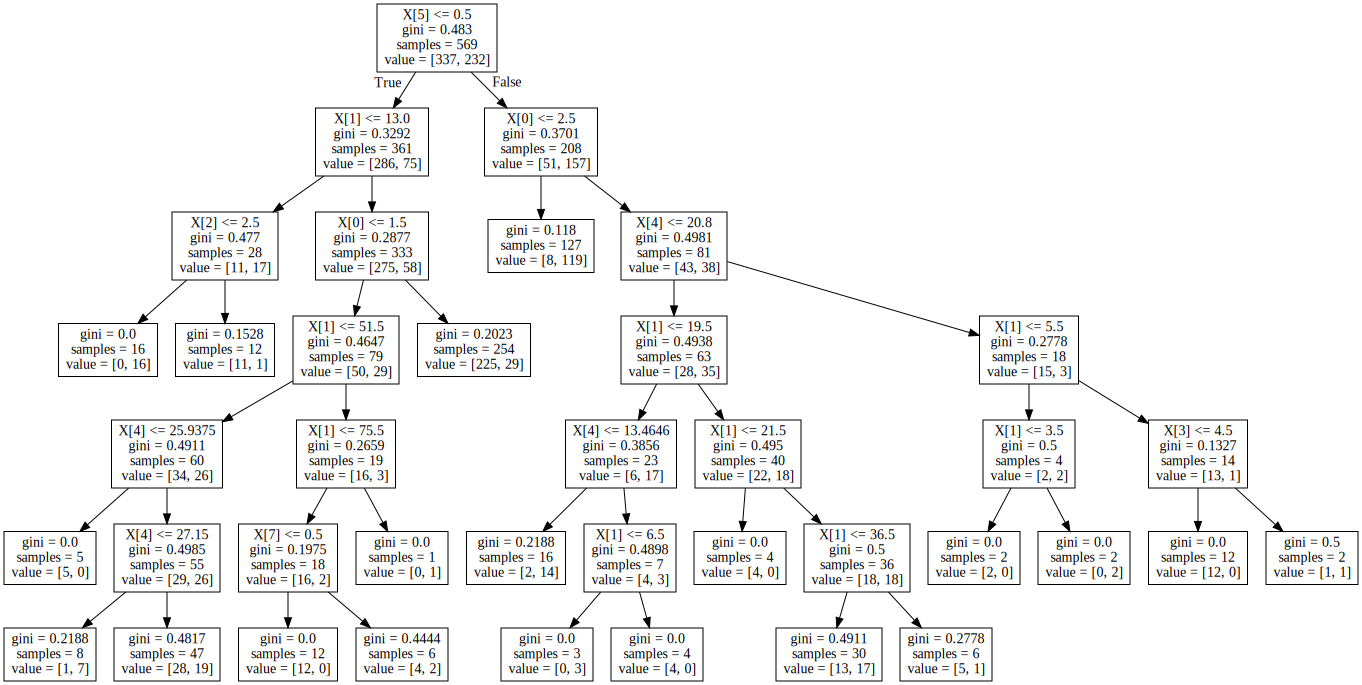

In [20]:
dot_data = tree.export_graphviz(res, out_file=None) 
graph = graphviz.Source(dot_data) 
graph